In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tqdm
import gc
import sys
import warnings
warnings.filterwarnings("ignore")

# Note: The dataset is too large in terms of features we will be using the dataset in form of chunks in the entire solution

In [5]:
date = pd.read_csv('../input/bosch-production-line-performance/train_date.csv.zip', nrows=10000)
numeric = pd.read_csv('../input/bosch-production-line-performance/train_numeric.csv.zip', nrows=10000)
category = pd.read_csv('../input/bosch-production-line-performance/train_categorical.csv.zip', nrows=10000)

In [6]:
date

,Id,L0_S0_D1,L0_S0_D3,L0_S0_D5,L0_S0_D7,L0_S0_D9,L0_S0_D11,L0_S0_D13,L0_S0_D15,L0_S0_D17,...,L3_S50_D4246,L3_S50_D4248,L3_S50_D4250,L3_S50_D4252,L3_S50_D4254,L3_S51_D4255,L3_S51_D4257,L3_S51_D4259,L3_S51_D4261,L3_S51_D4263
0,4,82.24,82.24,82.24,82.24,82.24,82.24,82.24,82.24,82.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9,1149.20,1149.20,1149.20,1149.20,1149.20,1149.20,1149.20,1149.20,1149.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11,602.64,602.64,602.64,602.64,602.64,602.64,602.64,602.64,602.64,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,19912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9996,19915,904.17,904.17,904.17,904.17,904.17,904.17,904.17,904.17,904.17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9997,19917,640.60,640.60,640.60,640.60,640.60,640.60,640.60,640.60,640.60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9998,19921,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
numeric

,Id,L0_S0_F0,L0_S0_F2,L0_S0_F4,L0_S0_F6,L0_S0_F8,L0_S0_F10,L0_S0_F12,L0_S0_F14,L0_S0_F16,...,L3_S50_F4245,L3_S50_F4247,L3_S50_F4249,L3_S50_F4251,L3_S50_F4253,L3_S51_F4256,L3_S51_F4258,L3_S51_F4260,L3_S51_F4262,Response
0,4,0.030,-0.034,-0.197,-0.179,0.118,0.116,-0.015,-0.032,0.020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,7,0.088,0.086,0.003,-0.052,0.161,0.025,-0.015,-0.072,-0.225,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,9,-0.036,-0.064,0.294,0.330,0.074,0.161,0.022,0.128,-0.026,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,11,-0.055,-0.086,0.294,0.330,0.118,0.025,0.030,0.168,-0.169,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,19912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
9996,19915,-0.147,-0.168,-0.033,-0.016,0.074,0.161,0.030,0.128,0.056,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
9997,19917,-0.095,0.004,0.330,0.312,-0.143,-0.339,0.037,0.128,0.061,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
9998,19921,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [8]:
category

,Id,L0_S1_F25,L0_S1_F27,L0_S1_F29,L0_S1_F31,L0_S2_F33,L0_S2_F35,L0_S2_F37,L0_S2_F39,L0_S2_F41,...,L3_S49_F4225,L3_S49_F4227,L3_S49_F4229,L3_S49_F4230,L3_S49_F4232,L3_S49_F4234,L3_S49_F4235,L3_S49_F4237,L3_S49_F4239,L3_S49_F4240
0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,19912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9996,19915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9997,19917,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9998,19921,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# FEATURE ENGINEERING

### The list of numeric features is selected based on the other XGBOOST classifier check the numericclassifier notebook

In [9]:
num_feats = ['Id',
       'L3_S30_F3514', 'L0_S9_F200', 'L3_S29_F3430', 'L0_S11_F314',
       'L0_S0_F18', 'L3_S35_F3896', 'L0_S12_F350', 'L3_S36_F3918',
       'L0_S0_F20', 'L3_S30_F3684', 'L1_S24_F1632', 'L0_S2_F48',
       'L3_S29_F3345', 'L0_S18_F449', 'L0_S21_F497', 'L3_S29_F3433',
       'L3_S30_F3764', 'L0_S1_F24', 'L3_S30_F3554', 'L0_S11_F322',
       'L3_S30_F3564', 'L3_S29_F3327', 'L0_S2_F36', 'L0_S9_F180',
       'L3_S33_F3855', 'L0_S0_F4', 'L0_S21_F477', 'L0_S5_F114',
       'L0_S6_F122', 'L1_S24_F1122', 'L0_S9_F165', 'L0_S18_F439',
       'L1_S24_F1490', 'L0_S6_F132', 'L3_S29_F3379', 'L3_S29_F3336',
       'L0_S3_F80', 'L3_S30_F3749', 'L1_S24_F1763', 'L0_S10_F219',
 'Response']

In [10]:
length = date.drop('Id', axis=1).count()
date_cols = length.reset_index().sort_values(by=0, ascending=False)
stations = sorted(date_cols['index'].str.split('_',expand=True)[1].unique().tolist())
date_cols['station'] = date_cols['index'].str.split('_',expand=True)[1]
date_cols = date_cols.drop_duplicates('station', keep='first')['index'].tolist()

In [11]:
data = None
for chunk in pd.read_csv('../input/bosch-production-line-performance/train_date.csv.zip',usecols=['Id'] + date_cols,chunksize=50000,low_memory=False):

    chunk.columns = ['Id'] + stations
    chunk['start_station'] = -1
    chunk['end_station'] = -1
    
    for s in stations:
        chunk[s] = 1 * (chunk[s] >= 0)
        id_not_null = chunk[chunk[s] == 1].Id
        chunk.loc[(chunk['start_station']== -1) & (chunk.Id.isin(id_not_null)),'start_station'] = int(s[1:])
        chunk.loc[chunk.Id.isin(id_not_null),'end_station'] = int(s[1:])   
    data = pd.concat([data, chunk])

In [12]:
for chunk in pd.read_csv('../input/bosch-production-line-performance/test_date.csv.zip',usecols=['Id'] + date_cols,chunksize=50000,low_memory=False):
    
    chunk.columns = ['Id'] + stations
    chunk['start_station'] = -1
    chunk['end_station'] = -1
    for s in stations:
        chunk[s] = 1 * (chunk[s] >= 0)
        id_not_null = chunk[chunk[s] == 1].Id
        chunk.loc[(chunk['start_station']== -1) & (chunk.Id.isin(id_not_null)),'start_station'] = int(s[1:])
        chunk.loc[chunk.Id.isin(id_not_null),'end_station'] = int(s[1:])   
    data = pd.concat([data, chunk])
del chunk
gc.collect()   

2743

In [13]:
data = data[['Id','start_station','end_station']]
usefuldatefeatures = ['Id']+date_cols

In [14]:
minmaxfeatures = None
for chunk in pd.read_csv('../input/bosch-production-line-performance/train_date.csv.zip',usecols=usefuldatefeatures,chunksize=50000,low_memory=False):
    features = chunk.columns.values.tolist()
    features.remove('Id')
    df_mindate_chunk = chunk[['Id']].copy()
    df_mindate_chunk['mindate'] = chunk[features].min(axis=1).values
    df_mindate_chunk['maxdate'] = chunk[features].max(axis=1).values
    df_mindate_chunk['min_time_station'] =  chunk[features].idxmin(axis = 1).apply(lambda s: int(s.split('_')[1][1:]) if s is not np.nan else -1)
    df_mindate_chunk['max_time_station'] =  chunk[features].idxmax(axis = 1).apply(lambda s: int(s.split('_')[1][1:]) if s is not np.nan else -1)
    minmaxfeatures = pd.concat([minmaxfeatures, df_mindate_chunk])

del chunk
gc.collect()

0

In [15]:
for chunk in pd.read_csv('../input/bosch-production-line-performance/test_date.csv.zip',usecols=usefuldatefeatures,chunksize=50000,low_memory=False):
    features = chunk.columns.values.tolist()
    features.remove('Id')
    df_mindate_chunk = chunk[['Id']].copy()
    df_mindate_chunk['mindate'] = chunk[features].min(axis=1).values
    df_mindate_chunk['maxdate'] = chunk[features].max(axis=1).values
    df_mindate_chunk['min_time_station'] =  chunk[features].idxmin(axis = 1).apply(lambda s: int(s.split('_')[1][1:]) if s is not np.nan else -1)
    df_mindate_chunk['max_time_station'] =  chunk[features].idxmax(axis = 1).apply(lambda s: int(s.split('_')[1][1:]) if s is not np.nan else -1)
    minmaxfeatures = pd.concat([minmaxfeatures, df_mindate_chunk])

del chunk
gc.collect()

0

In [16]:
minmaxfeatures.sort_values(by=['mindate', 'Id'], inplace=True)
minmaxfeatures['min_Id_rev'] = -minmaxfeatures.Id.diff().shift(-1)
minmaxfeatures['min_Id'] = minmaxfeatures.Id.diff()

In [17]:
cols = [['Id']+date_cols,num_feats]

In [18]:
traindata = None
testdata = None

In [19]:
trainfiles = ['train_date.csv.zip','train_numeric.csv.zip']
testfiles = ['test_date.csv.zip','test_numeric.csv.zip']

In [20]:
for i,f in enumerate(trainfiles):
    
    subset = None
    
    for chunk in pd.read_csv('../input/bosch-production-line-performance/' + f,usecols=cols[i],chunksize=100000,low_memory=False):
        subset = pd.concat([subset, chunk])
    
    if traindata is None:
        traindata = subset.copy()
    else:
        traindata = pd.merge(traindata, subset.copy(), on="Id")
        
del subset,chunk
gc.collect()
del cols[1][-1]

In [21]:
for i, f in enumerate(testfiles):
    subset = None
    
    for chunk in pd.read_csv('../input/bosch-production-line-performance/' + f,usecols=cols[i],chunksize=100000,low_memory=False):
        subset = pd.concat([subset, chunk])
        
    if testdata is None:
        testdata = subset.copy()
    else:
        testdata = pd.merge(testdata, subset.copy(), on="Id")
    
del subset,chunk
gc.collect()

0

In [22]:
traindata = traindata.merge(minmaxfeatures, on='Id')
traindata = traindata.merge(data, on='Id')
testdata = testdata.merge(minmaxfeatures, on='Id')
testdata = testdata.merge(data, on='Id')

In [23]:
del minmaxfeatures,data
gc.collect()

40

In [24]:
traindata

,Id,L0_S0_D3,L0_S1_D30,L0_S2_D54,L0_S3_D70,L0_S4_D106,L0_S5_D115,L0_S6_D120,L0_S7_D143,L0_S8_D145,...,L3_S36_F3918,Response,mindate,maxdate,min_time_station,max_time_station,min_Id_rev,min_Id,start_station,end_station
0,4,82.24,82.24,82.24,NaN,82.26,NaN,NaN,82.26,82.27,...,NaN,0,82.24,87.29,0,35,-224451.0,-2314450.0,0,42
1,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,1313.12,1315.75,12,33,-67530.0,-2284042.0,2,42
2,7,1618.70,1618.70,1618.70,NaN,NaN,1618.72,1618.72,NaN,1618.73,...,NaN,0,1618.70,1624.42,0,33,-26876.0,-2313512.0,0,42
3,9,1149.20,1149.20,1149.21,NaN,1149.22,NaN,NaN,1149.22,1149.22,...,-0.192,0,1149.20,1154.16,0,36,-3564.0,-2196581.0,0,42
4,11,602.64,602.64,NaN,602.64,602.66,NaN,NaN,602.67,602.67,...,-0.092,0,602.64,606.02,0,36,-1.0,-2226678.0,0,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183742,2367490,1239.90,1239.90,1239.91,NaN,1239.93,NaN,1239.93,NaN,1239.94,...,NaN,0,1239.90,1244.04,0,33,2365689.0,925004.0,0,42
1183743,2367491,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.092,0,624.22,626.66,12,36,1572356.0,71839.0,2,42
1183744,2367492,1482.18,1482.18,NaN,1482.19,NaN,1482.20,1482.21,NaN,1482.21,...,0.108,0,1482.18,1490.61,0,34,2358793.0,53955.0,0,42
1183745,2367493,608.83,608.83,NaN,608.83,608.85,NaN,NaN,608.85,608.85,...,NaN,0,608.83,610.75,0,33,2357190.0,8988.0,0,42


In [25]:
testdata

,Id,L0_S0_D3,L0_S1_D30,L0_S2_D54,L0_S3_D70,L0_S4_D106,L0_S5_D115,L0_S6_D120,L0_S7_D143,L0_S8_D145,...,L3_S35_F3896,L3_S36_F3918,mindate,maxdate,min_time_station,max_time_station,min_Id_rev,min_Id,start_station,end_station
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.310,NaN,792.77,800.70,24,34,-3232.0,-2326858.0,30,42
1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.108,1045.96,1060.07,27,36,-62612.0,-2366837.0,33,42
2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.199,NaN,671.95,711.08,24,34,-16069.0,-2315057.0,30,42
3,5,255.45,255.45,255.46,NaN,255.48,NaN,NaN,255.48,255.48,...,NaN,0.008,255.45,256.28,0,36,-33948.0,-2364005.0,0,42
4,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.048,NaN,743.40,770.28,24,33,-4312.0,-1898699.0,30,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183743,2367483,653.85,653.85,653.85,NaN,653.86,NaN,NaN,653.87,653.87,...,-0.202,NaN,653.85,655.45,0,35,2042322.0,7590.0,0,42
1183744,2367485,907.34,907.34,NaN,907.34,NaN,907.37,NaN,907.37,907.37,...,-0.133,NaN,907.34,911.29,0,34,2318983.0,3483.0,0,42
1183745,2367486,185.92,185.92,185.92,NaN,185.96,NaN,185.96,NaN,185.96,...,-0.132,NaN,185.92,186.32,0,35,2316034.0,4732.0,0,42
1183746,2367489,570.85,570.85,570.86,NaN,NaN,570.88,NaN,570.89,570.89,...,0.125,NaN,570.85,572.67,0,35,2351203.0,10503.0,0,42


In [26]:
traindata.fillna(value=0,inplace=True)
testdata.fillna(value=0,inplace=True)

In [27]:
def mcc(tp, tn, fp, fn):
    num = tp * tn - fp * fn
    den = (tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)
    if den == 0:
        return 0
    else:
        return num / np.sqrt(den)

In [28]:
def eval_mcc(y_true, y_prob):
    idx = np.argsort(y_prob)
    y_true_sort = y_true[idx]
    n = y_true.shape[0]
    nump = 1.0 * np.sum(y_true) 
    numn = n - nump 
    tp,fp = nump,numn
    tn,fn = 0.0,0.0
    best_mcc = 0.0
    best_id = -1
    mccs = np.zeros(n)
    for i in range(n):
        if y_true_sort[i] == 1:
            tp -= 1.0
            fn += 1.0
        else:
            fp -= 1.0
            tn += 1.0
        new_mcc = mcc(tp, tn, fp, fn)
        mccs[i] = new_mcc
        if new_mcc >= best_mcc:
            best_mcc = new_mcc
            best_id = i
    return best_mcc

In [29]:
def mcc_eval(y_prob, dtrain):
    y_true = dtrain.get_label()
    best_mcc = eval_mcc(y_true, y_prob)
    return 'MCC', best_mcc

In [30]:
np.set_printoptions(suppress=True)

In [31]:
import gc

In [32]:
total = traindata[traindata['Response']==0].sample(frac=1).head(400000)
total = pd.concat([total,traindata[traindata['Response']==1]]).sample(frac=1)

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X,y = total.drop(['Response','Id'],axis=1),total['Response']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)

# MODELLING

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
model = RandomForestClassifier(n_estimators=500,n_jobs=-1,verbose=1,random_state=11)
model.fit(X_train,y_train)
pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   40.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  7.9min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    5.4s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    6.2s finished


In [38]:
from sklearn.metrics import recall_score,precision_score,plot_precision_recall_curve,confusion_matrix,classification_report,matthews_corrcoef

In [39]:
print(classification_report(pred,y_test))
print(matthews_corrcoef(y_test,pred))
confusion_matrix(y_test,pred)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99    121614
           1       0.20      0.90      0.32       450

    accuracy                           0.99    122064
   macro avg       0.60      0.94      0.66    122064
weighted avg       1.00      0.99      0.99    122064

0.4176894146364587


array([[119956,     44],
       [  1658,    406]])

In [40]:
print(recall_score(y_test,pred))
precision_score(y_test,pred)

0.19670542635658914


0.9022222222222223

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.7s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    5.8s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    6.5s finished


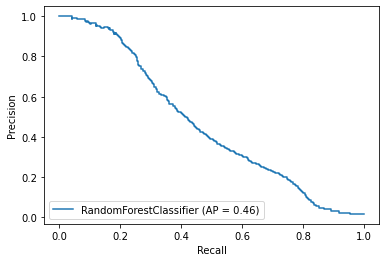

In [41]:
plot_precision_recall_curve(model,X_test,y_test)

In [42]:
test = model.predict(testdata.drop(['Id'],axis=1))

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    5.8s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   26.2s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   59.7s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:  1.1min finished


In [47]:
testdata['Response'] = test
testdata[['Id','Response']].to_csv("submit.csv",index=False)

In [49]:
!gzip submit.csv

In [48]:
!rm submit.csv.gz

In [ ]:
total